In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

In [2]:
source_path = 'data/garbage_classification_6_classes/garbage_classification/'

source_path_cardboard = os.path.join(source_path, 'cardboard')
source_path_glass = os.path.join(source_path, 'glass')
source_path_metal = os.path.join(source_path, 'metal')
source_path_paper = os.path.join(source_path, 'paper')
source_path_plastic = os.path.join(source_path, 'plastic')
source_path_trash = os.path.join(source_path, 'trash')

# Functions

## Display images

In [3]:
def display_image(img, title=None):
    """ Function to display an image
    Args:
        1) img - image object
        2) title - the title that will be displayed above the image
    Returns:
        None; but displays an image
    """
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [61]:
def display_original_augmented_img(original_img, augmented_img, original_title=None, augmented_title=None):
    """ Function to display the original and augmented image on the same graph
    Args:
        1) original_img - object of the original image
        2) augmented_img - augmented image object
        3) original_title - title for the original image
        4) augmented_title - title for the augmented image
    Returns:
        None; but displays images
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img)
    axes[0].set_title(original_title)
    
    axes[1].imshow(augmented_img)
    axes[1].set_title(augmented_title)
    plt.show()

## Perform image augmentation using ImageDataGenerator

In [82]:
def perform_ImageDataGen_augmentation(imageDataGenerator, images, image_filenames, target_size, 
                                      augm_prefix, num_augm_images=3, augm_images_dir_path=None, 
                                      save_augm_image=True, display_orig_augm_images=False):
    """ Function to create augmented images from images using imageDataGenerator
    Args:
        1) imageDataGenerator - ImageDataGenerator class object
        2) images - a list of images, each of which is stored as a numpy array
        3) image_filenames - a list of image file names images (the names are used in the headers of the images that will be saved)
        4) target_size - the size of the images
        5) augm_prefix - prefix to be added to the beginning of the file name to indicate the augmentation technique
        6) num_augm_images - the number of instances of augmented images for one original
        7) augm_images_dir_path - the path to the folder where you want to save the augmented images (used if save_augm_image=True)
        8) save_augm_image - whether to save the augmented image
        9) display_orig_augm_images - whether to display the original and augmented image at the same time (original - left, augmented - right)
    Returns:
        None; but saves or displays augmented_images
    """
    augmented_index = 0
    for (image_name, img) in zip(image_filenames, images):
        x = img.copy()
        x = np.expand_dims(x, axis=0)

        i = 0
        for batch in datagen.flow(x, batch_size=1):
            i += 1
            if i > num_augmented_images:
                augmented_index = 0
                break 
            
            augmented_image_name = f"{augm_prefix}_{image_name.split('.')[0]}_{augmented_index}.jpg"
        
            augmented_index += 1
            
            if save_augm_image and (augm_images_dir_path is not None):
                os.makedirs(augmented_images_dir, exist_ok=True)
                augmented_image_path = os.path.join(augmented_images_dir, augmented_image_name)
                tf.keras.preprocessing.image.save_img(augmented_image_path, batch[0])
            if display_orig_augm_images:
                display_original_augmented_img(original_img=img, augmented_img=batch[0].copy().astype(np.uint8), 
                                               original_title=f"Original_image: {image_name}", 
                                               augmented_title=f"{augm_prefix}: {image_name}")

# View test data

In [ ]:
image_filepaths = [source_path_cardboard, source_path_glass, source_path_metal, source_path_paper, source_path_plastic, 
                   source_path_trash]
image_filenames = ['cardboard148.jpg', 'glass93.jpg', 'metal69.jpg', 'paper104.jpg', 'plastic118.jpg',
                  'trash28.jpg']
show_images = True
images = []
for image_filepath, image_filename in zip(image_filepaths, image_filenames):
    img = cv2.imread(os.path.join(image_filepath, image_filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    
    if show_images:
        display_image(img, title=image_filename)

# Perform image augmentation using ImageDataGenerator and cv2 algorithms 

In [7]:
# Get the size of the image (height, width)
img_height, img_width = img.shape[:2]
print(f"img_height = {img_height}, img_width = {img_width}")

img_height = 384, img_width = 512


## rotation

In [87]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 3

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames, 
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size, 
                                  augm_prefix='aug_Rotation', num_augm_images=num_augmented_images, 
                                  save_augm_image=True)

In [ ]:
img_index = 1
img = images[img_index]
image_filename = image_filenames[img_index]

angle = 30

height, width = img.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

# Apply the rotation to the image using warpAffine
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

# Find non-zero pixels in the rotated image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Adjust the bounding box coordinates for the rotated image
x_new = x - (width - w) // 2
y_new = y - (height - h) // 2

# Crop the rotated image to the adjusted bounding box
rotated_image_cropped = rotated_image[y_new:y_new+h, x_new:x_new+w]

display_original_augmented_img(original_img=img, augmented_img=rotated_image,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"Rotated_img: {image_filename}")

display_original_augmented_img(original_img=img, augmented_img=rotated_image_cropped,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"Rotated_cropped_img: {image_filename}")

## width_shift

In [88]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 3

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames, 
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size, 
                                  augm_prefix='aug_wShift', num_augm_images=num_augmented_images, 
                                  save_augm_image=True)

In [ ]:
# Define the height shift fraction (a fraction of total height)
width_shift_fraction = 0.1  # Example: shift the image by 10% of total height

# Load your image
img = images[1]

# Get the height and width of the image
height, width = img.shape[:2]

# Calculate the height shift value
width_shift = int(height * width_shift_fraction)

# Generate a random height shift value within the specified range
random_width_shift = np.random.randint(-width_shift, width_shift + 1)

# Calculate the new y-coordinate for height shift
y_shifted = height // 2 + random_width_shift

# Calculate the rotation matrix for height shift
shift_matrix = np.float32([[1, 0, 0], [0, 1, random_width_shift]])

# Apply the height shift to the image using warpAffine
changed_image = cv2.warpAffine(img, shift_matrix, (width, height))

# Find non-zero pixels in the shifted image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(changed_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Crop the shifted image to the adjusted bounding box
changed_image_cropped = changed_image[y:y+h, x:x+w]

display_original_augmented_img(original_img=img, augmented_img=changed_image,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"wShifted_img: {image_filename}")

display_original_augmented_img(original_img=img, augmented_img=changed_image_cropped,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"wShifted_cropped_img: {image_filename}")

## height_shift

In [89]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    fill_mode='nearest'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames, 
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size, 
                                  augm_prefix='aug_hShift', num_augm_images=num_augmented_images, 
                                  save_augm_image=True)

In [ ]:
height_shift_fraction = 0.1

img_index = 0
img = images[img_index]
image_filename = image_filenames[img_index]
height, width = img.shape[:2]

# Calculate the height shift value
height_shift = int(width * height_shift_fraction)

# Generate a random height shift value within the specified range
random_height_shift = np.random.randint(-height_shift, height_shift + 1)

# Calculate the new x-coordinate for height shift
x_shifted = width // 2 + random_height_shift

# Calculate the rotation matrix for height shift
shift_matrix = np.float32([[1, 0, random_height_shift], [0, 1, 0]])

# Apply the height shift to the image using warpAffine
changed_image = cv2.warpAffine(img, shift_matrix, (width, height))

# Find non-zero pixels in the rotated image
non_zero_pixels = cv2.findNonZero(cv2.cvtColor(changed_image, cv2.COLOR_BGR2GRAY))

# Get the bounding box of non-zero pixels
x, y, w, h = cv2.boundingRect(non_zero_pixels)

# Crop the rotated image to the adjusted bounding box
changed_image_cropped = changed_image[y:y+h, x:x+w]

display_original_augmented_img(original_img=img, augmented_img=changed_image,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"hShifted_img: {image_filename}")

display_original_augmented_img(original_img=img, augmented_img=changed_image_cropped,
                               original_title=f"Original_img: {image_filename}",
                               augmented_title=f"hShifted_cropped_img: {image_filename}")

## horizontal_flip

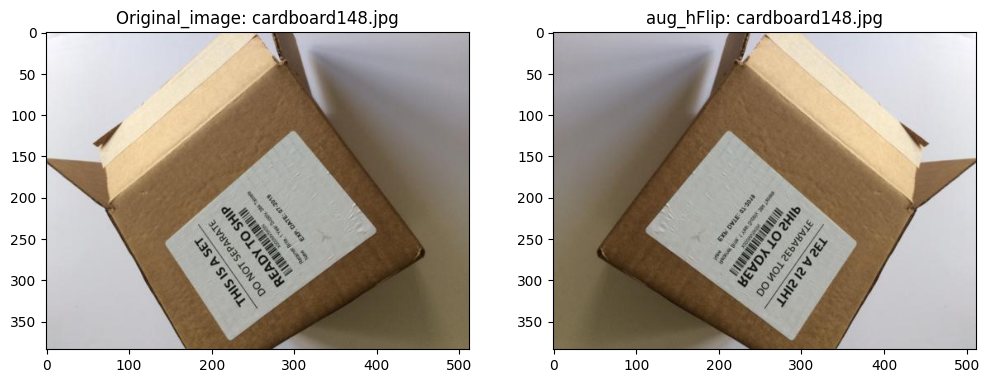

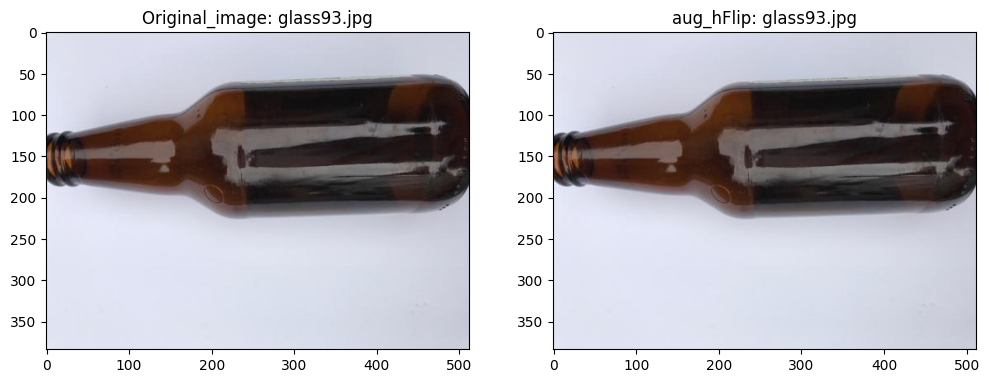

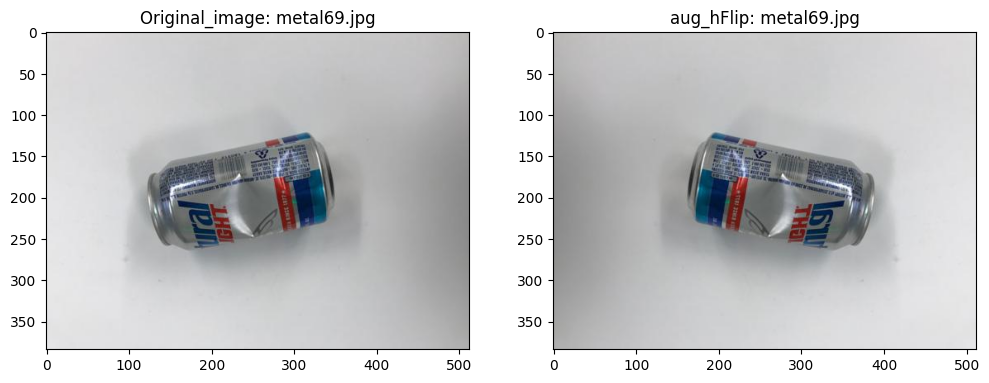

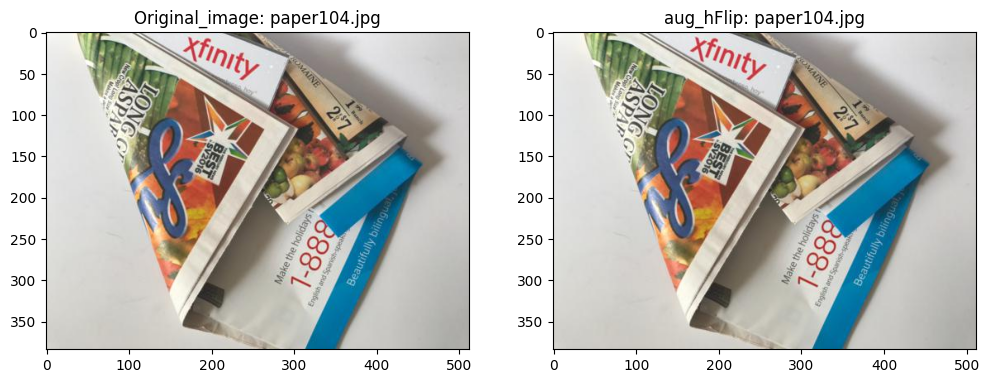

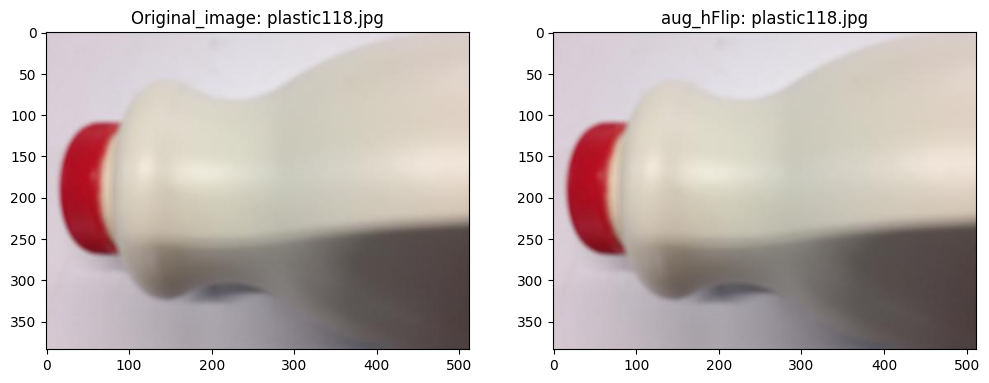

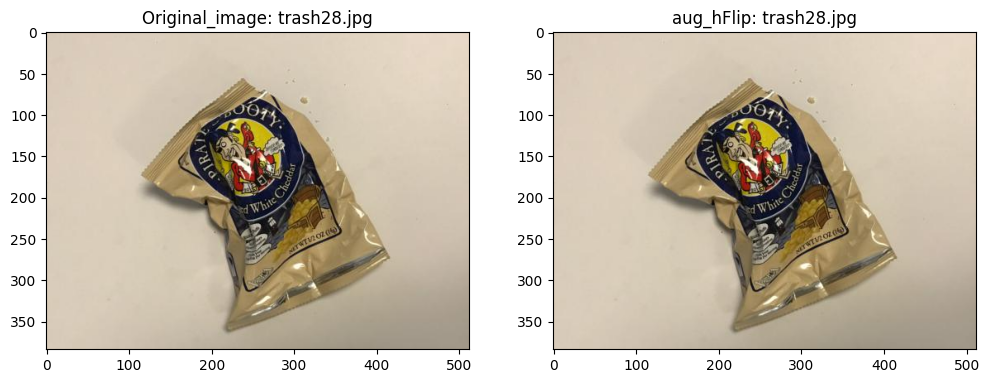

In [91]:
# Define your augmentation parameters
datagen = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='constant'
)

augmented_images_dir = 'data/garbage_classification_6_classes/garbage_classification_augmentation_test/'

os.makedirs(augmented_images_dir, exist_ok=True)

target_size = (img_height, img_width)

num_augmented_images = 1

perform_ImageDataGen_augmentation(imageDataGenerator=datagen, images=images, image_filenames=image_filenames, 
                                  augm_images_dir_path=augmented_images_dir, target_size=target_size, 
                                  augm_prefix='aug_hFlip', num_augm_images=num_augmented_images, 
                                  save_augm_image=True, display_orig_augm_images=True)

In [ ]:
for img, image_filename in zip(images, image_filenames):
    display_image(img, title=image_filename)

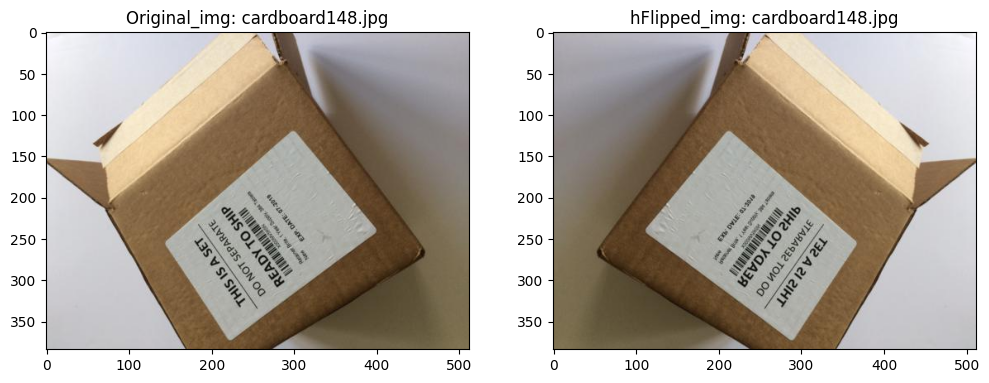

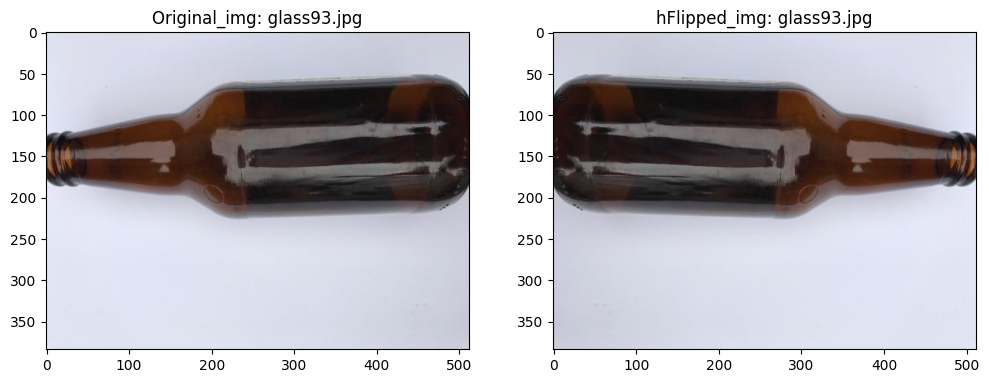

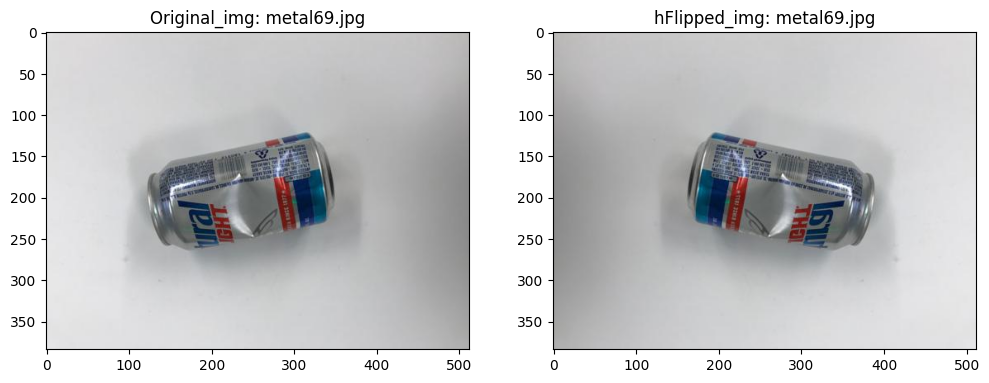

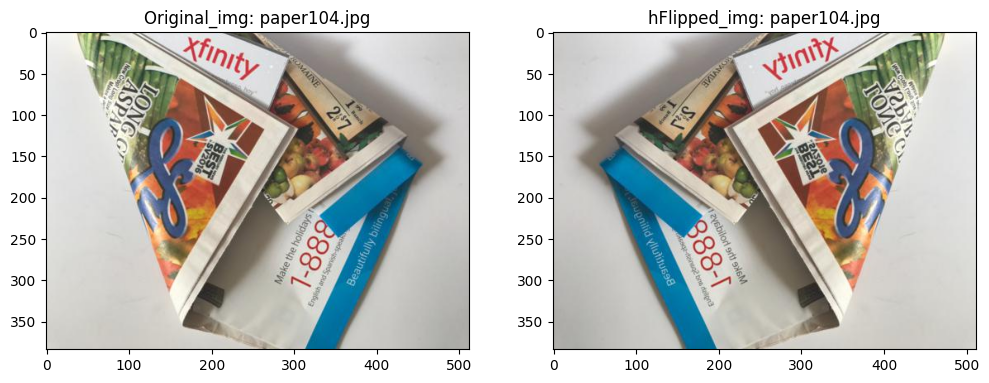

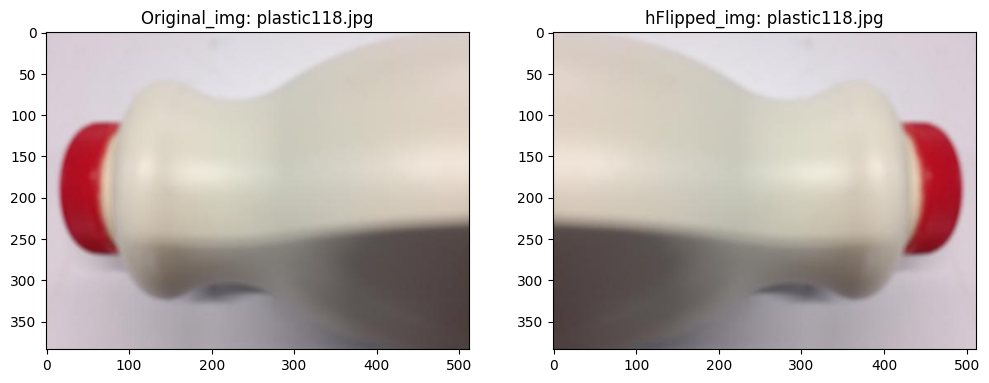

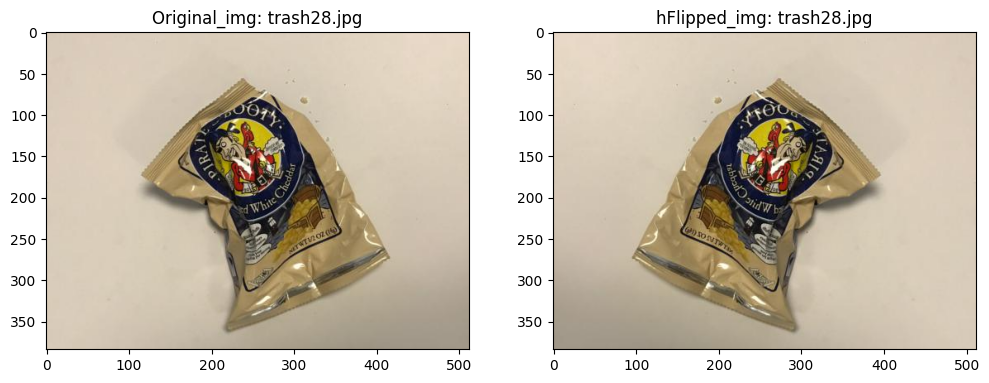

In [92]:
for img, image_filename in zip(images, image_filenames):
    # Flip the image horizontally
    flipped_image = cv2.flip(img.copy(), 1)
    display_original_augmented_img(original_img=img, augmented_img=flipped_image, 
                                   original_title=f"Original_img: {image_filename}",
                                   augmented_title=f"hFlipped_img: {image_filename}")